In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

 Гипергеометрическое распределение Гаусса $$f(x,a,b,c,z) = C x^{a-1} (1-x)^{b-1} (1+zx)^{-c}$$

In [150]:
a = 13.8
b = 3.12
c = 2.51
z = 5.18

# зададим распределенную случайную величину
gauss_rv = sts.gausshyper(a, b, c, z)

# сгенерируем 1000 значений
gauss = gauss_rv.rvs(size=1000)

Гиптограмма выборки и теоретическая плотность распределения СВ

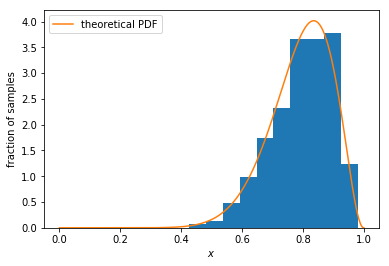

In [151]:
# гистограмма выборки
plt.hist(gauss, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# теоретическая плотность распределения
# данное распределение определено на интервале [0,1]
x = np.linspace(0,1,1000)
pdf = gauss_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.legend()

In [152]:
# параметры исходного распределения
# следующие данные необходимы для вычисления математического ожидания
# считаем частоту повторений для каждого значения выборки и заносим данные в словарь
d = {}
for value in gauss:
    if value not in d.keys():
        d[value] = 0
    d[value] += 1
# математическое ожидание
E = np.average(d.keys(), weights=d.values())
print("Математическое ожидание: " + str(E))
# дисперссия
D = gauss_rv.var()
print("Дисперссия: " + str(D))

Математическое ожидание: 0.7950457262002821
Дисперссия: 0.01028072909374711


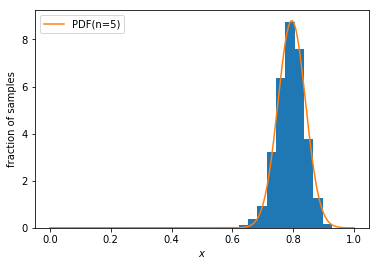

In [159]:
# генерируем 1000 выборок объема 5
n = 5
gauss = np.array([gauss_rv.rvs(size=n) for i in range(1000)]) 

# находим выборочное среднее для каждой выборки 
x_n = []
for i in range(1000):
    x_n.append(gauss[i].sum() / n)
    
# гистограмма выборочных средних
plt.hist(x_n, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

x=np.linspace(0,1,1000)
# определим параметры нормального распределения при n=5
D_n = D / n # дисперсия для нормального распределения приближающего выборку средних
sigma_n = np.sqrt(D_n) # сигма для нормального распределения выборки средних
norm_n = sts.norm(E, sigma_n) # определяем нормальное распределение с расчетными характеристиками исходного распределения
pdf_n = norm_n.pdf(x) # получаем плотность распределения
# строим гистограмму массива средних при n=5 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf_n, label='PDF(n=5)')
plt.legend(loc='best')

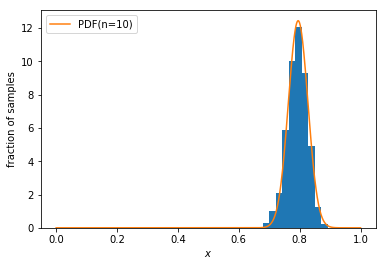

In [160]:
# генерируем 1000 выборок объема 10
n = 10
gauss = np.array([gauss_rv.rvs(size=n) for i in range(1000)]) 

# находим выборочное среднее для каждой выборки 
x_n = []
for i in range(1000):
    x_n.append(gauss[i].sum() / n)
    
# гистограмма выборочных средних
plt.hist(x_n, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

x=np.linspace(0,1,1000)
# определим параметры нормального распределения при n=10
D_n = D / n # дисперсия для нормального распределения приближающего выборку средних
sigma_n = np.sqrt(D_n) # сигма для нормального распределения выборки средних
norm_n = sts.norm(E, sigma_n) # определяем нормальное распределение с расчетными характеристиками исходного распределения
pdf_n = norm_n.pdf(x) # получаем плотность распределения
# строим гистограмму массива средних при n=10 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf_n, label='PDF(n=10)')
plt.legend(loc='best')

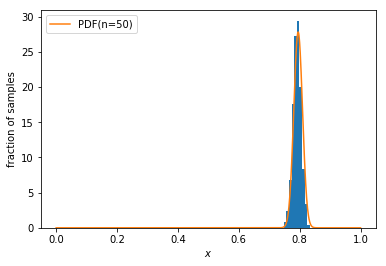

In [161]:
# генерируем 1000 выборок объема 50
n = 50
gauss = np.array([gauss_rv.rvs(size=n) for i in range(1000)]) 

# находим выборочное среднее для каждой выборки 
x_n = []
for i in range(1000):
    x_n.append(gauss[i].sum() / n)
    
# гистограмма выборочных средних
plt.hist(x_n, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

x=np.linspace(0,1,1000)
# определим параметры нормального распределения при n=50
D_n = D / n # дисперсия для нормального распределения приближающего выборку средних
sigma_n = np.sqrt(D_n) # сигма для нормального распределения выборки средних
norm_n = sts.norm(E, sigma_n) # определяем нормальное распределение с расчетными характеристиками исходного распределения
pdf_n = norm_n.pdf(x) # получаем плотность распределения
# строим гистограмму массива средних при n=50 и плотность описывающую этот массив нормального распределения
plt.plot(x, pdf_n, label='PDF(n=50)')
plt.legend(loc='best')

Вывод: чем больше n, тем точнее гистограмма описывается функцией теоретической плотности распределения. Значения распределения с увеличением n ближе к математическому ожиданию (в данном случае к 0.8)